In [ ]:
!pip install obsei[all]
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.1/281.1 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.0/415.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.2/167.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import logging
import sys

In [ ]:
from obsei.source.youtube_scrapper import YoutubeScrapperSource, YoutubeScrapperConfig
from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig,
    ZeroShotClassificationAnalyzer
)

# PUT IN YOUTUBE VIDEO LINKS IN THE video_url VARIABLE BELOW

In [ ]:
video_url = 'https://www.youtube.com/watch?v=IZXxSmbdsrw'

In [ ]:
source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments=50,
    lookup_period="1Y",
)

source = YoutubeScrapperSource()
source_response_list = source.lookup(source_config)
print(len(source_response_list))
print(type(source_response_list))

for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")

20
<class 'list'>
source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'UgyY6rDiJI_nCkHPuTJ4AaABAg', 'text': 'I feel bad for josh, his back must be killing him from carrying this channel', 'time': datetime.datetime(2023, 9, 30, 21, 51, 48, 182639, tzinfo=datetime.timezone.utc), 'author': '@SirAaronFox', 'channel': 'UCdUYmDCPu6hZLSNRlI5ZL4w', 'votes': '1,6K', 'photo': 'https://yt3.ggpht.com/CoAx5ZhfCwSjeaOza7X9D-kLxhxCC-h8LE0l-KpId1FXVCfN5VldBdKxHHUQF89xZYx2karyP44=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, 'source_name': 'YoutubeScrapper', 'processed_text': 'I feel bad for josh, his back must be killing him from carrying this channel'}'
source_response#'1'='{'segmented_data': {}, 'meta': {'comment_id': 'UgxCDdqTN0SxGrZ2nXZ4AaABAg', 'text': '"we never have dumb moments" editor immediately exposing Josh is golden', 'time': datetime.datetime(2023, 9, 30, 21, 51, 48, 190584, tzinfo=datetime.timezone.utc), 'author': '@HeisenbergFam', 'channel': 'UClFDTPiMwDQpppSO-gnkFAQ', '

In [ ]:
text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)

analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)

for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


analyzer_response#'0'='{'segmented_data': {'classifier_data': {'negative': 0.9310036897659302, 'positive': 0.00031990749994292855}}, 'meta': {'comment_id': 'UgyY6rDiJI_nCkHPuTJ4AaABAg', 'text': 'I feel bad for josh, his back must be killing him from carrying this channel', 'time': datetime.datetime(2023, 9, 30, 21, 51, 48, 182639, tzinfo=datetime.timezone.utc), 'author': '@SirAaronFox', 'channel': 'UCdUYmDCPu6hZLSNRlI5ZL4w', 'votes': '1,6K', 'photo': 'https://yt3.ggpht.com/CoAx5ZhfCwSjeaOza7X9D-kLxhxCC-h8LE0l-KpId1FXVCfN5VldBdKxHHUQF89xZYx2karyP44=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, 'source_name': 'YoutubeScrapper', 'processed_text': 'I feel bad for josh, his back must be killing him from carrying this channel'}'
analyzer_response#'1'='{'segmented_data': {'classifier_data': {'positive': 0.9755585193634033, 'negative': 0.0017737841699272394}}, 'meta': {'comment_id': 'UgxCDdqTN0SxGrZ2nXZ4AaABAg', 'text': '"we never have dumb moments" editor immediately exposing Josh is golden',

In [ ]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()
dataframe = sink.send_data(analyzer_response_list, sink_config)
dataframe

/usr/local/lib/python3.10/dist-packages/obsei/sink/pandas_sink.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  config.dataframe = config.dataframe.append(responses)


,processed_text,segmented_data_classifier_data_negative,segmented_data_classifier_data_positive,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"I feel bad for josh, his back must be killing ...",0.93,0.00,UgyY6rDiJI_nCkHPuTJ4AaABAg,"I feel bad for josh, his back must be killing ...",2023-09-30 21:51:48.182639+00:00,@SirAaronFox,UCdUYmDCPu6hZLSNRlI5ZL4w,"1,6K",https://yt3.ggpht.com/CoAx5ZhfCwSjeaOza7X9D-kL...,False,YoutubeScrapper
1,"""we never have dumb moments"" editor immediatel...",0.00,0.98,UgxCDdqTN0SxGrZ2nXZ4AaABAg,"""we never have dumb moments"" editor immediatel...",2023-09-30 21:51:48.190584+00:00,@HeisenbergFam,UClFDTPiMwDQpppSO-gnkFAQ,898,https://yt3.ggpht.com/mPRBAx6GSww_LJqHFR1L54Hj...,False,YoutubeScrapper
2,It’s Tobi’s reactions and Josh that carries th...,0.20,0.58,UgzVSz_3WDFWdlFPZPd4AaABAg,It’s Tobi’s reactions and Josh that carries th...,2023-09-30 21:51:48.195533+00:00,@breadfastplayz7684,UC5Kbb4ML7y7B1JllVpMI6KQ,549,https://yt3.ggpht.com/6AMYRG-HYSIQVQizOSXQL3ZB...,False,YoutubeScrapper
3,Tobi and josh carrying the Sidemen. JJ and Har...,0.39,0.41,UgwGaUiwzlx2D0vKr9J4AaABAg,Tobi and josh carrying the Sidemen. JJ and Har...,2023-09-30 21:51:48.200278+00:00,@nvgirl1807,UCeUgrdwv2YBiEVDXOWvgRnw,274,https://yt3.ggpht.com/ytc/APkrFKZUunFDoSa42DGW...,False,YoutubeScrapper
4,“Mural” and “A. Milk” will always be iconic. \...,0.00,0.93,Ugwv_0Nafim4UkDpoOR4AaABAg,“Mural” and “A. Milk” will always be iconic. \...,NaT,@nicktroisi6347,UCKp1x6iDaRuqOqtODaLSSWg,40,https://yt3.ggpht.com/ytc/APkrFKbxrWZDlWS_PFTv...,False,YoutubeScrapper
5,Josh carrying the sidemen as per usual,0.00,0.95,UgxGKaupnrkRvmPo1kF4AaABAg,Josh carrying the sidemen as per usual,2023-09-30 21:51:48.238264+00:00,@kalensmith23,UC3dCvzcHPR8S-kwrfxAXESA,"1,7K",https://yt3.ggpht.com/ytc/APkrFKbq5hGD4n5fW7CS...,False,YoutubeScrapper
6,Tobi and josh are literally the dads of the gr...,0.02,0.55,Ugww0dMRqRFEkYkzA8R4AaABAg,Tobi and josh are literally the dads of the gr...,2023-09-30 21:51:48.243237+00:00,@ApBeVibin,UCWjDihdcDUdE36JcR-sasYQ,146,https://yt3.ggpht.com/ytc/APkrFKbbK8GPU7dBmR4L...,False,YoutubeScrapper
7,"""Never ever ever ever"" editor immediately expo...",0.88,0.00,UgzVpbHROeeqiSeAuXt4AaABAg,"""Never ever ever ever"" editor immediately expo...",2023-10-01 00:51:48.248535+00:00,@johnclydemalagueno559,UCP_nb9U0BaEFPW5P18msl0A,20,https://yt3.ggpht.com/ytc/APkrFKacdqkT1aC5o3VY...,False,YoutubeScrapper
8,Josh is so underrated \nHe's so consistent and...,0.98,0.01,UgyoNGWrh-ZHgCmDd_V4AaABAg,Josh is so underrated \nHe's so consistent and...,NaT,@tg4108,UCXYy2gC61KEWHnjPo9e6Tfw,17,https://yt3.ggpht.com/ytc/APkrFKZfeAg2sNboLs9l...,False,YoutubeScrapper
9,The comment about Ethan getting hate for react...,0.03,0.88,UgyC-gHAf3O5-g_pTnZ4AaABAg,The comment about Ethan getting hate for react...,2023-09-30 21:51:48.289105+00:00,@jerkeysnake3214,UC4lERnwzXTu9TCzuXyksfjQ,51,https://yt3.ggpht.com/ytc/APkrFKYTb-NjeAKgbtYR...,False,YoutubeScrapper


In [ ]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5] #prints out all negative comments

,processed_text,segmented_data_classifier_data_negative,segmented_data_classifier_data_positive,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"I feel bad for josh, his back must be killing ...",0.93,0.00,UgyY6rDiJI_nCkHPuTJ4AaABAg,"I feel bad for josh, his back must be killing ...",2023-09-30 21:51:48.182639+00:00,@SirAaronFox,UCdUYmDCPu6hZLSNRlI5ZL4w,"1,6K",https://yt3.ggpht.com/CoAx5ZhfCwSjeaOza7X9D-kL...,False,YoutubeScrapper
7,"""Never ever ever ever"" editor immediately expo...",0.88,0.00,UgzVpbHROeeqiSeAuXt4AaABAg,"""Never ever ever ever"" editor immediately expo...",2023-10-01 00:51:48.248535+00:00,@johnclydemalagueno559,UCP_nb9U0BaEFPW5P18msl0A,20,https://yt3.ggpht.com/ytc/APkrFKacdqkT1aC5o3VY...,False,YoutubeScrapper
8,Josh is so underrated \nHe's so consistent and...,0.98,0.01,UgyoNGWrh-ZHgCmDd_V4AaABAg,Josh is so underrated \nHe's so consistent and...,NaT,@tg4108,UCXYy2gC61KEWHnjPo9e6Tfw,17,https://yt3.ggpht.com/ytc/APkrFKZfeAg2sNboLs9l...,False,YoutubeScrapper
12,"josh is hard carrying the channel, we better s...",0.81,0.00,Ugz2O6PcpqlC87xK1gJ4AaABAg,"josh is hard carrying the channel, we better s...",2023-09-30 21:51:48.306461+00:00,@Gumbowl,UCrTjwESUQRy0eqSgawSEHoQ,27,https://yt3.ggpht.com/r_Z4KuBqi_PRJ2u8LgwqdH_L...,False,YoutubeScrapper
19,Why Josh always stretching when he does an int...,0.55,0.55,UgwukffXc8UaU_q55Q54AaABAg,Why Josh always stretching when he does an int...,2023-09-30 21:51:48.342377+00:00,@giuSE2004,UCljzfTaqwIydW9EKlRBoGyg,22,https://yt3.ggpht.com/ytc/APkrFKaYBmGH2h8Dbigb...,False,YoutubeScrapper


<Axes: >

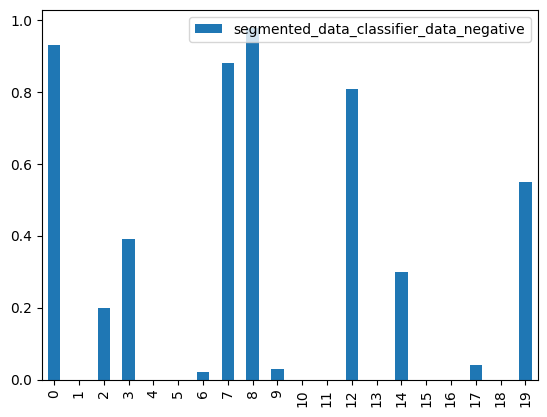

In [ ]:
dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar() #plot of no of negative comments

In [ ]:
dataframe.loc[dataframe['segmented_data_classifier_data_positive'].astype('float')>0.5] #prints out all positive comments

,processed_text,segmented_data_classifier_data_negative,segmented_data_classifier_data_positive,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
1,"""we never have dumb moments"" editor immediatel...",0.00,0.98,UgxCDdqTN0SxGrZ2nXZ4AaABAg,"""we never have dumb moments"" editor immediatel...",2023-09-30 21:51:48.190584+00:00,@HeisenbergFam,UClFDTPiMwDQpppSO-gnkFAQ,898,https://yt3.ggpht.com/mPRBAx6GSww_LJqHFR1L54Hj...,False,YoutubeScrapper
2,It’s Tobi’s reactions and Josh that carries th...,0.20,0.58,UgzVSz_3WDFWdlFPZPd4AaABAg,It’s Tobi’s reactions and Josh that carries th...,2023-09-30 21:51:48.195533+00:00,@breadfastplayz7684,UC5Kbb4ML7y7B1JllVpMI6KQ,549,https://yt3.ggpht.com/6AMYRG-HYSIQVQizOSXQL3ZB...,False,YoutubeScrapper
4,“Mural” and “A. Milk” will always be iconic. \...,0.00,0.93,Ugwv_0Nafim4UkDpoOR4AaABAg,“Mural” and “A. Milk” will always be iconic. \...,NaT,@nicktroisi6347,UCKp1x6iDaRuqOqtODaLSSWg,40,https://yt3.ggpht.com/ytc/APkrFKbxrWZDlWS_PFTv...,False,YoutubeScrapper
5,Josh carrying the sidemen as per usual,0.00,0.95,UgxGKaupnrkRvmPo1kF4AaABAg,Josh carrying the sidemen as per usual,2023-09-30 21:51:48.238264+00:00,@kalensmith23,UC3dCvzcHPR8S-kwrfxAXESA,"1,7K",https://yt3.ggpht.com/ytc/APkrFKbq5hGD4n5fW7CS...,False,YoutubeScrapper
6,Tobi and josh are literally the dads of the gr...,0.02,0.55,Ugww0dMRqRFEkYkzA8R4AaABAg,Tobi and josh are literally the dads of the gr...,2023-09-30 21:51:48.243237+00:00,@ApBeVibin,UCWjDihdcDUdE36JcR-sasYQ,146,https://yt3.ggpht.com/ytc/APkrFKbbK8GPU7dBmR4L...,False,YoutubeScrapper
9,The comment about Ethan getting hate for react...,0.03,0.88,UgyC-gHAf3O5-g_pTnZ4AaABAg,The comment about Ethan getting hate for react...,2023-09-30 21:51:48.289105+00:00,@jerkeysnake3214,UC4lERnwzXTu9TCzuXyksfjQ,51,https://yt3.ggpht.com/ytc/APkrFKYTb-NjeAKgbtYR...,False,YoutubeScrapper
10,-dumbest moments- are the most entertaining on...,0.00,0.73,UgxYihCEKKMtOgxPgEx4AaABAg,-dumbest moments- are the most entertaining on...,2023-09-30 21:51:48.296426+00:00,@BonnieDaLegend,UCuNpzpgD7tn6nGmEBBmN6nQ,49,https://yt3.ggpht.com/t1GawL9CfA1atNZDPoi17t3_...,False,YoutubeScrapper
11,Love when Josh&Tobi Reacts uploads ❤,0.00,0.98,UgyE2FSHuGp4J8xM5g14AaABAg,Love when Josh&Tobi Reacts uploads ❤,2023-09-30 21:51:48.301547+00:00,@blazedjord,UC8ghK8xQfl7lelvID8yWwvg,62,https://yt3.ggpht.com/ytc/APkrFKbdaUQEj8w6X_2f...,False,YoutubeScrapper
13,"The era of JJ tryna say ""Mural"" will forever b...",0.00,0.67,UgxRIAbK5OPl8k4TomF4AaABAg,"The era of JJ tryna say ""Mural"" will forever b...",2023-09-30 22:51:48.311679+00:00,@scmeeerr1253,UCPQLzC0Qv3LgGp_DVxxYsnA,8,https://yt3.ggpht.com/ytc/APkrFKYtBeppdrTusYuK...,False,YoutubeScrapper
15,You guys are back at it again 😂,0.00,0.93,UgwJHjkeMwr8lyl8H9F4AaABAg,You guys are back at it again 😂,2023-09-30 21:51:48.321645+00:00,@aaravjain3691,UC6RyxCqFnhq0I6OuhQGcpwQ,24,https://yt3.ggpht.com/ytc/APkrFKbEeMbF4yaphw8I...,False,YoutubeScrapper


<Axes: >

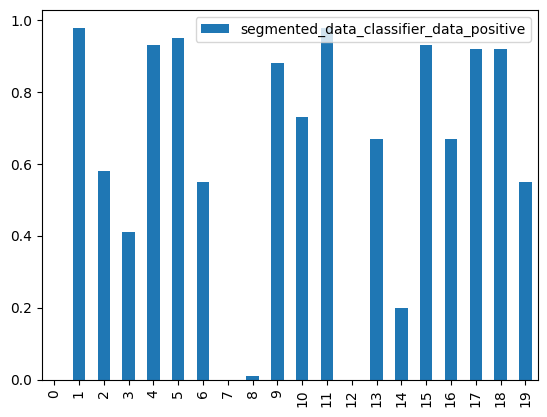

In [ ]:
dataframe[['segmented_data_classifier_data_positive']].astype('float').plot.bar() #plot of positive comments